Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Data

In [3]:
insurance_df =pd.read_csv('/content/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_df[insurance_df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


There is one dublicate value.So we can drop the duplicate row.

In [9]:
insurance_df_no_duplicate=insurance_df.drop_duplicates()
insurance_df_no_duplicate

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Exploratory Data Analysis

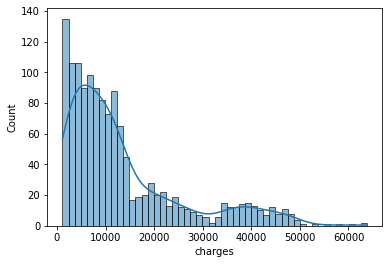

In [10]:
## Exploring the target variable 'charges'
sns.histplot(data=insurance_df_no_duplicate,x='charges',bins=50,kde=True)

In [11]:
insurance_df_no_duplicate.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

Exploring the variable Age

In [12]:
insurance_df_no_duplicate.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

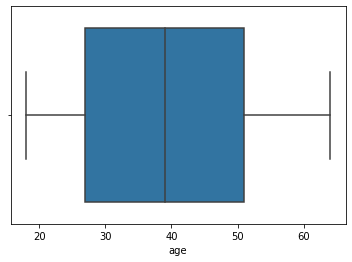

In [13]:
sns.boxplot(data=insurance_df_no_duplicate,x='age')

Exploring the Sex Variable

In [14]:
insurance_df_no_duplicate.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

The Distribution of the sex is balanced.what is the amount of charges paid by sex?


Text(0.5, 1.0, 'Sex Boxplot')

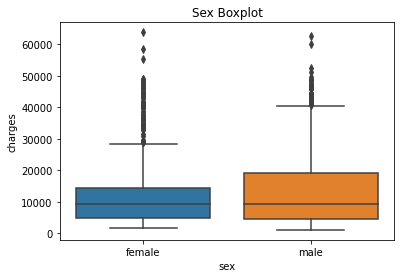

In [16]:
sns.boxplot(data=insurance_df_no_duplicate,x='sex',y='charges')
plt.title('Sex Boxplot')

Males seem to pay quite more in charges than females.

In [17]:
insurance_df_no_duplicate.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [18]:
female_charges=insurance_df_no_duplicate.groupby('sex')['charges'].mean()[0]
male_charges=insurance_df_no_duplicate.groupby('sex')['charges'].mean()[1]
male_charges-female_charges

1405.4200199276147

Males pay $1405.42 more.

In [20]:
insurance_df_no_duplicate[insurance_df_no_duplicate.sex=='male'].charges.describe()

count      675.000000
mean     13974.998864
std      12971.958663
min       1121.873900
25%       4654.022675
50%       9377.904700
75%      19006.685500
max      62592.873090
Name: charges, dtype: float64

In [21]:
insurance_df_no_duplicate[insurance_df_no_duplicate.sex=='female'].charges.describe()

count      662.000000
mean     12569.578844
std      11128.703801
min       1607.510100
25%       4885.158700
50%       9412.962500
75%      14454.691825
max      63770.428010
Name: charges, dtype: float64

Exploring the BMI Variable

In [22]:
insurance_df_no_duplicate.bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

Is there a correlation with "charges" feature?

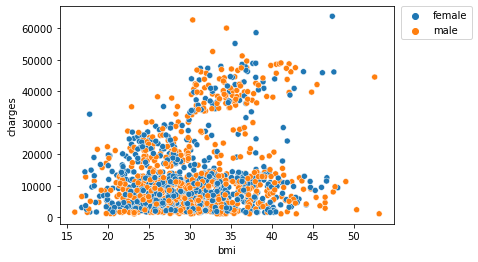

In [24]:
sns.scatterplot(data=insurance_df_no_duplicate, x='bmi',y='charges',hue='sex')
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)

It doesnot seem to be a strong relationship but it is positive for sure;moreover there are not two well defined clusters based on sex.
checking the distribution of the variable BMI.

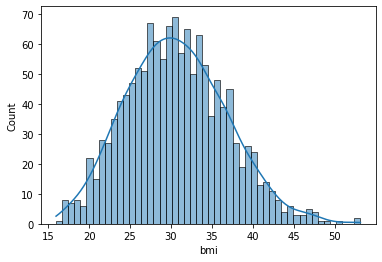

In [25]:
sns.histplot(data=insurance_df_no_duplicate,x='bmi',bins=50,kde=True)

BMI variable seems to be normally distributed.

In [26]:
##Exploring the children variable

In [27]:
insurance_df_no_duplicate.children.describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

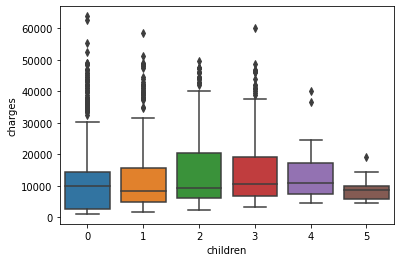

In [29]:
sns.boxplot(data=insurance_df_no_duplicate,x='children',y='charges')

In [30]:
insurance_df_no_duplicate.groupby('children')['charges'].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

On average who has 2 or 3 children spends more money in cahrges

In [31]:
###  Exploring the Smoking Variable
insurance_df_no_duplicate.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

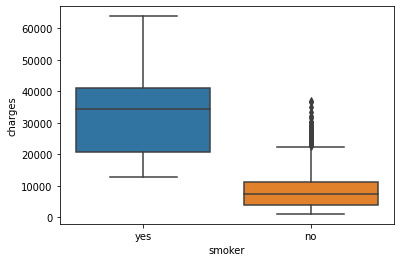

In [32]:
sns.boxplot(data=insurance_df_no_duplicate,x='smoker',y='charges')

In [33]:
insurance_df_no_duplicate[insurance_df_no_duplicate.smoker=='yes'].charges.describe()

count      274.000000
mean     32050.231832
std      11541.547176
min      12829.455100
25%      20826.244213
50%      34456.348450
75%      41019.207275
max      63770.428010
Name: charges, dtype: float64

In [34]:
insurance_df_no_duplicate[insurance_df_no_duplicate.smoker=='no'].charges.describe()

count     1063.000000
mean      8440.660307
std       5992.973800
min       1121.873900
25%       3988.883500
50%       7345.726600
75%      11363.019100
max      36910.608030
Name: charges, dtype: float64

In [35]:
##Exploring the region  variable
insurance_df_no_duplicate.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

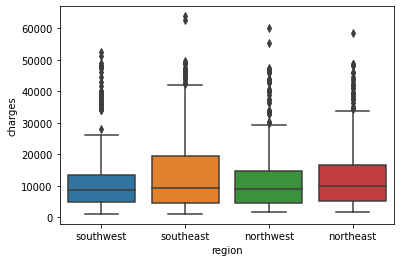

In [37]:
sns.boxplot(data=insurance_df_no_duplicate,x='region',y='charges')

# Feature Engineering
In this section are performed all the necessary steps to transform variables that will be used in the machine learning model.

Defining Inputs and Target

In [39]:
input_df=insurance_df_no_duplicate.drop(columns='charges')
target_df=insurance_df_no_duplicate.charges

In [40]:
input_df

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [41]:
target_df

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

# Creating a variable to cluster the BMI
it will be added a new feature to cluster observations on their BMI values.
these are the different ranges:
-if BMI is less than 18.5 it falls within the underweight range.
- if BMI is 18.5 to 24.9 it falls within the normal or healthy weight range
- if BMI is 25.0 to 29.9 it falls within the overweight range
-if BMI is 30.0 or higher it falls within the obese range

In [43]:
def bmi_estimator(column):
  if column < 18.5:
    return 'underweight'
  elif (column >=18.5) and (column <=24.9):
    return 'healthy weight'
  elif (column>=25) and (column<=29.9):
    return 'overweight'
  else:
    return 'obese'


In [44]:
input_df['bmi_class']=input_df.bmi.map(bmi_estimator)
input_df

,age,sex,bmi,children,smoker,region,bmi_class
0,19,female,27.900,0,yes,southwest,overweight
1,18,male,33.770,1,no,southeast,obese
2,28,male,33.000,3,no,southeast,obese
3,33,male,22.705,0,no,northwest,healthy weight
4,32,male,28.880,0,no,northwest,overweight
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,obese
1334,18,female,31.920,0,no,northeast,obese
1335,18,female,36.850,0,no,southeast,obese
1336,21,female,25.800,0,no,southwest,overweight


Encoding Sex and Smoking Variables

In [45]:
sex_dict={'male':0,'female':1}
smoker_dict={'no':0,'yes':1}

input_df['sex']=input_df.sex.map(sex_dict)
input_df['smoker']=input_df.smoker.map(smoker_dict)

Encoding the Region variable
it is used the one-hot encoding procedure.

In [46]:
columns_to_encode=['region','bmi_class']

In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(input_df[columns_to_encode])
encoded_cols=list(encoder.get_feature_names_out(columns_to_encode))
input_df[encoded_cols]=encoder.transform(input_df[columns_to_encode])

In [48]:
input_df=input_df.drop(columns='region')
input_df

,age,sex,bmi,children,smoker,bmi_class,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,19,1,27.900,0,1,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,0,33.770,1,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,0,33.000,3,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,0,22.705,0,0,healthy weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,0,28.880,0,0,overweight,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,obese,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,obese,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,18,1,36.850,0,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,21,1,25.800,0,0,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
##Scaling values  using MinMax Scaler
columns_to_scale = ['age','bmi','children']
input_df[columns_to_scale].head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler().fit(input_df[columns_to_scale])
input_df[columns_to_scale]=scaler.transform(input_df[columns_to_scale])

In [51]:
input_df=input_df.drop(columns='bmi_class')
input_df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,1,0.321227,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0,0.479150,0.2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0,0.458434,0.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0,0.181464,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0,0.347592,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
input_df.describe().loc[['min','max']]

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Splitting the Input Data Frame into a Train and validation one

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(input_df,target_df,test_size=0.2,random_state=42)

In [54]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
1114,0.108696,0,0.230024,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
968,0.065217,0,0.263250,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
599,0.739130,1,0.580172,0.4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
170,0.978261,0,0.686306,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
275,0.630435,1,0.286252,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.717391,1,0.511165,0.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1131,0.195652,0,0.805488,0.4,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1295,0.043478,0,0.162497,0.2,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
861,0.434783,1,0.323917,0.6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
X_val

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
900,0.673913,0,0.176352,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1064,0.239130,1,0.259349,0.8,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1256,0.717391,1,0.549502,0.6,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.282609,0,0.495830,0.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
237,0.282609,0,0.603444,0.4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.000000,0,0.659672,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
542,0.978261,1,0.547215,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
760,0.086957,1,0.500942,0.4,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1284,0.934783,0,0.547215,0.2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [56]:
y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

In [57]:
y_val

900      8688.85885
1064     5708.86700
1256    11436.73815
298     38746.35510
237      4463.20510
           ...     
534     13831.11520
542     13887.20400
760      3925.75820
1284    47403.88000
1285     8534.67180
Name: charges, Length: 268, dtype: float64

Creating the Model

In [58]:
from xgboost import XGBRegressor

In [60]:
model = XGBRegressor(n_jobs=-1,n_estimators=1000, early_stopping_round=50,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)])

[11:04:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15912.4	validation_1-rmse:17893.1
[1]	validation_0-rmse:14483.4	validation_1-rmse:16251.4
[2]	validation_0-rmse:13207.2	validation_1-rmse:14783.8
[3]	validation_0-rmse:12070.6	validation_1-rmse:13499.6
[4]	validation_0-rmse:11059.8	validation_1-rmse:12316
[5]	validation_0-rmse:10164	validation_1-rmse:11294.9
[6]	validation_0-rmse:9371.52	validation_1-rmse:10366.8
[7]	validation_0-rmse:8671.54	validation_1-rmse:9561.35
[8]	validation_0-rmse:8057.48	validation_1-rmse:8844.47
[9]	validation_0-rmse:7520.58	validation_1-rmse:8215.13
[10]	validation_0-rmse:7052.39	validation_1-rmse:7665.89
[11]	validation_0-rmse:6647.09	validation_1-rmse:7169.32
[12]	validation_0-rmse:6295.09	validation_1-rmse:6747.3
[13]	validation_0-rmse:5992.9	validation_1-rmse:6378.34
[14]	validation_0-rmse:5733.58	validation_1-rmse:6064.46
[15]	validation_0-rmse:5511.85	val

XGBRegressor(early_stopping_round=50, n_estimators=1000, n_jobs=-1,
             random_state=42)

Checking the Importance of Each Feature

In [61]:
feature_importance_df = pd.DataFrame({
    'Feature':input_df.columns,
    'Importance':model.feature_importances_
})
feature_importance_df.sort_values('Importance',ascending=False)

,Feature,Importance
4,smoker,0.928956
0,age,0.015141
2,bmi,0.013046
3,children,0.007452
6,region_northwest,0.007138
10,bmi_class_obese,0.006628
11,bmi_class_overweight,0.004417
5,region_northeast,0.004352
7,region_southeast,0.004324
1,sex,0.003115


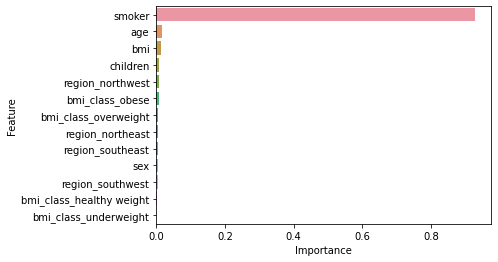

In [62]:
sns.barplot(data=feature_importance_df.sort_values('Importance',ascending=False),y='Feature',x='Importance')

To check the best number of trees

In [66]:
from sklearn.metrics import r2_score

print('The R^2 score for the Training set is: {}'.format(r2_score(y_train,model.predict(X_train))))
print('The R^2 score for the Training set is: {}'.format(r2_score(y_val,model.predict(X_val))))

The R^2 score for the Training set is: 0.9704595339007692
The R^2 score for the Training set is: 0.8809026338772235


In [67]:
from sklearn.metrics import mean_squared_error

rmse= mean_squared_error(y_val,model.predict(X_val),squared=False)
nrmse= rmse/(max(target_df)-min(target_df))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))

The RMSE is: 4678.126038958676
The NRMSE is: 0.07467253004346593
